In [74]:
!kaggle datasets download rashadrmammadov/lung-cancer-prediction
!unzip lung-cancer-prediction

Dataset URL: https://www.kaggle.com/datasets/rashadrmammadov/lung-cancer-prediction
License(s): CC0-1.0
lung-cancer-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  lung-cancer-prediction.zip
replace lung_cancer_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
pd.set_option("display.max_columns", 500)

In [77]:
df = pd.read_csv("lung_cancer_data.csv")
df.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,Alkaline_Phosphatase_Level,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,No,Yes,Yes,Yes,No,Yes,Yes,Yes,3,161,99,92,13.538000,9.800707,321.735266,3.568383,49.310048,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,Yes,Yes,Yes,No,No,Yes,Yes,No,4,101,91,93,16.800312,4.378428,251.581538,3.699357,111.421632,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,Yes,No,No,No,Yes,Yes,No,No,0,109,74,81,14.473493,6.157792,393.456532,4.708385,76.648006,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,Yes,Yes,No,Yes,No,Yes,Yes,No,1,103,85,68,17.442063,6.259383,275.177898,4.727672,81.952486,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,No,Yes,Yes,Yes,No,Yes,No,No,0,165,69,99,13.545171,5.203516,381.705572,4.605604,107.513423,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [78]:
df["Stage"].value_counts()

Stage
Stage IV     6011
Stage III    5922
Stage I      5905
Stage II     5820
Name: count, dtype: int64

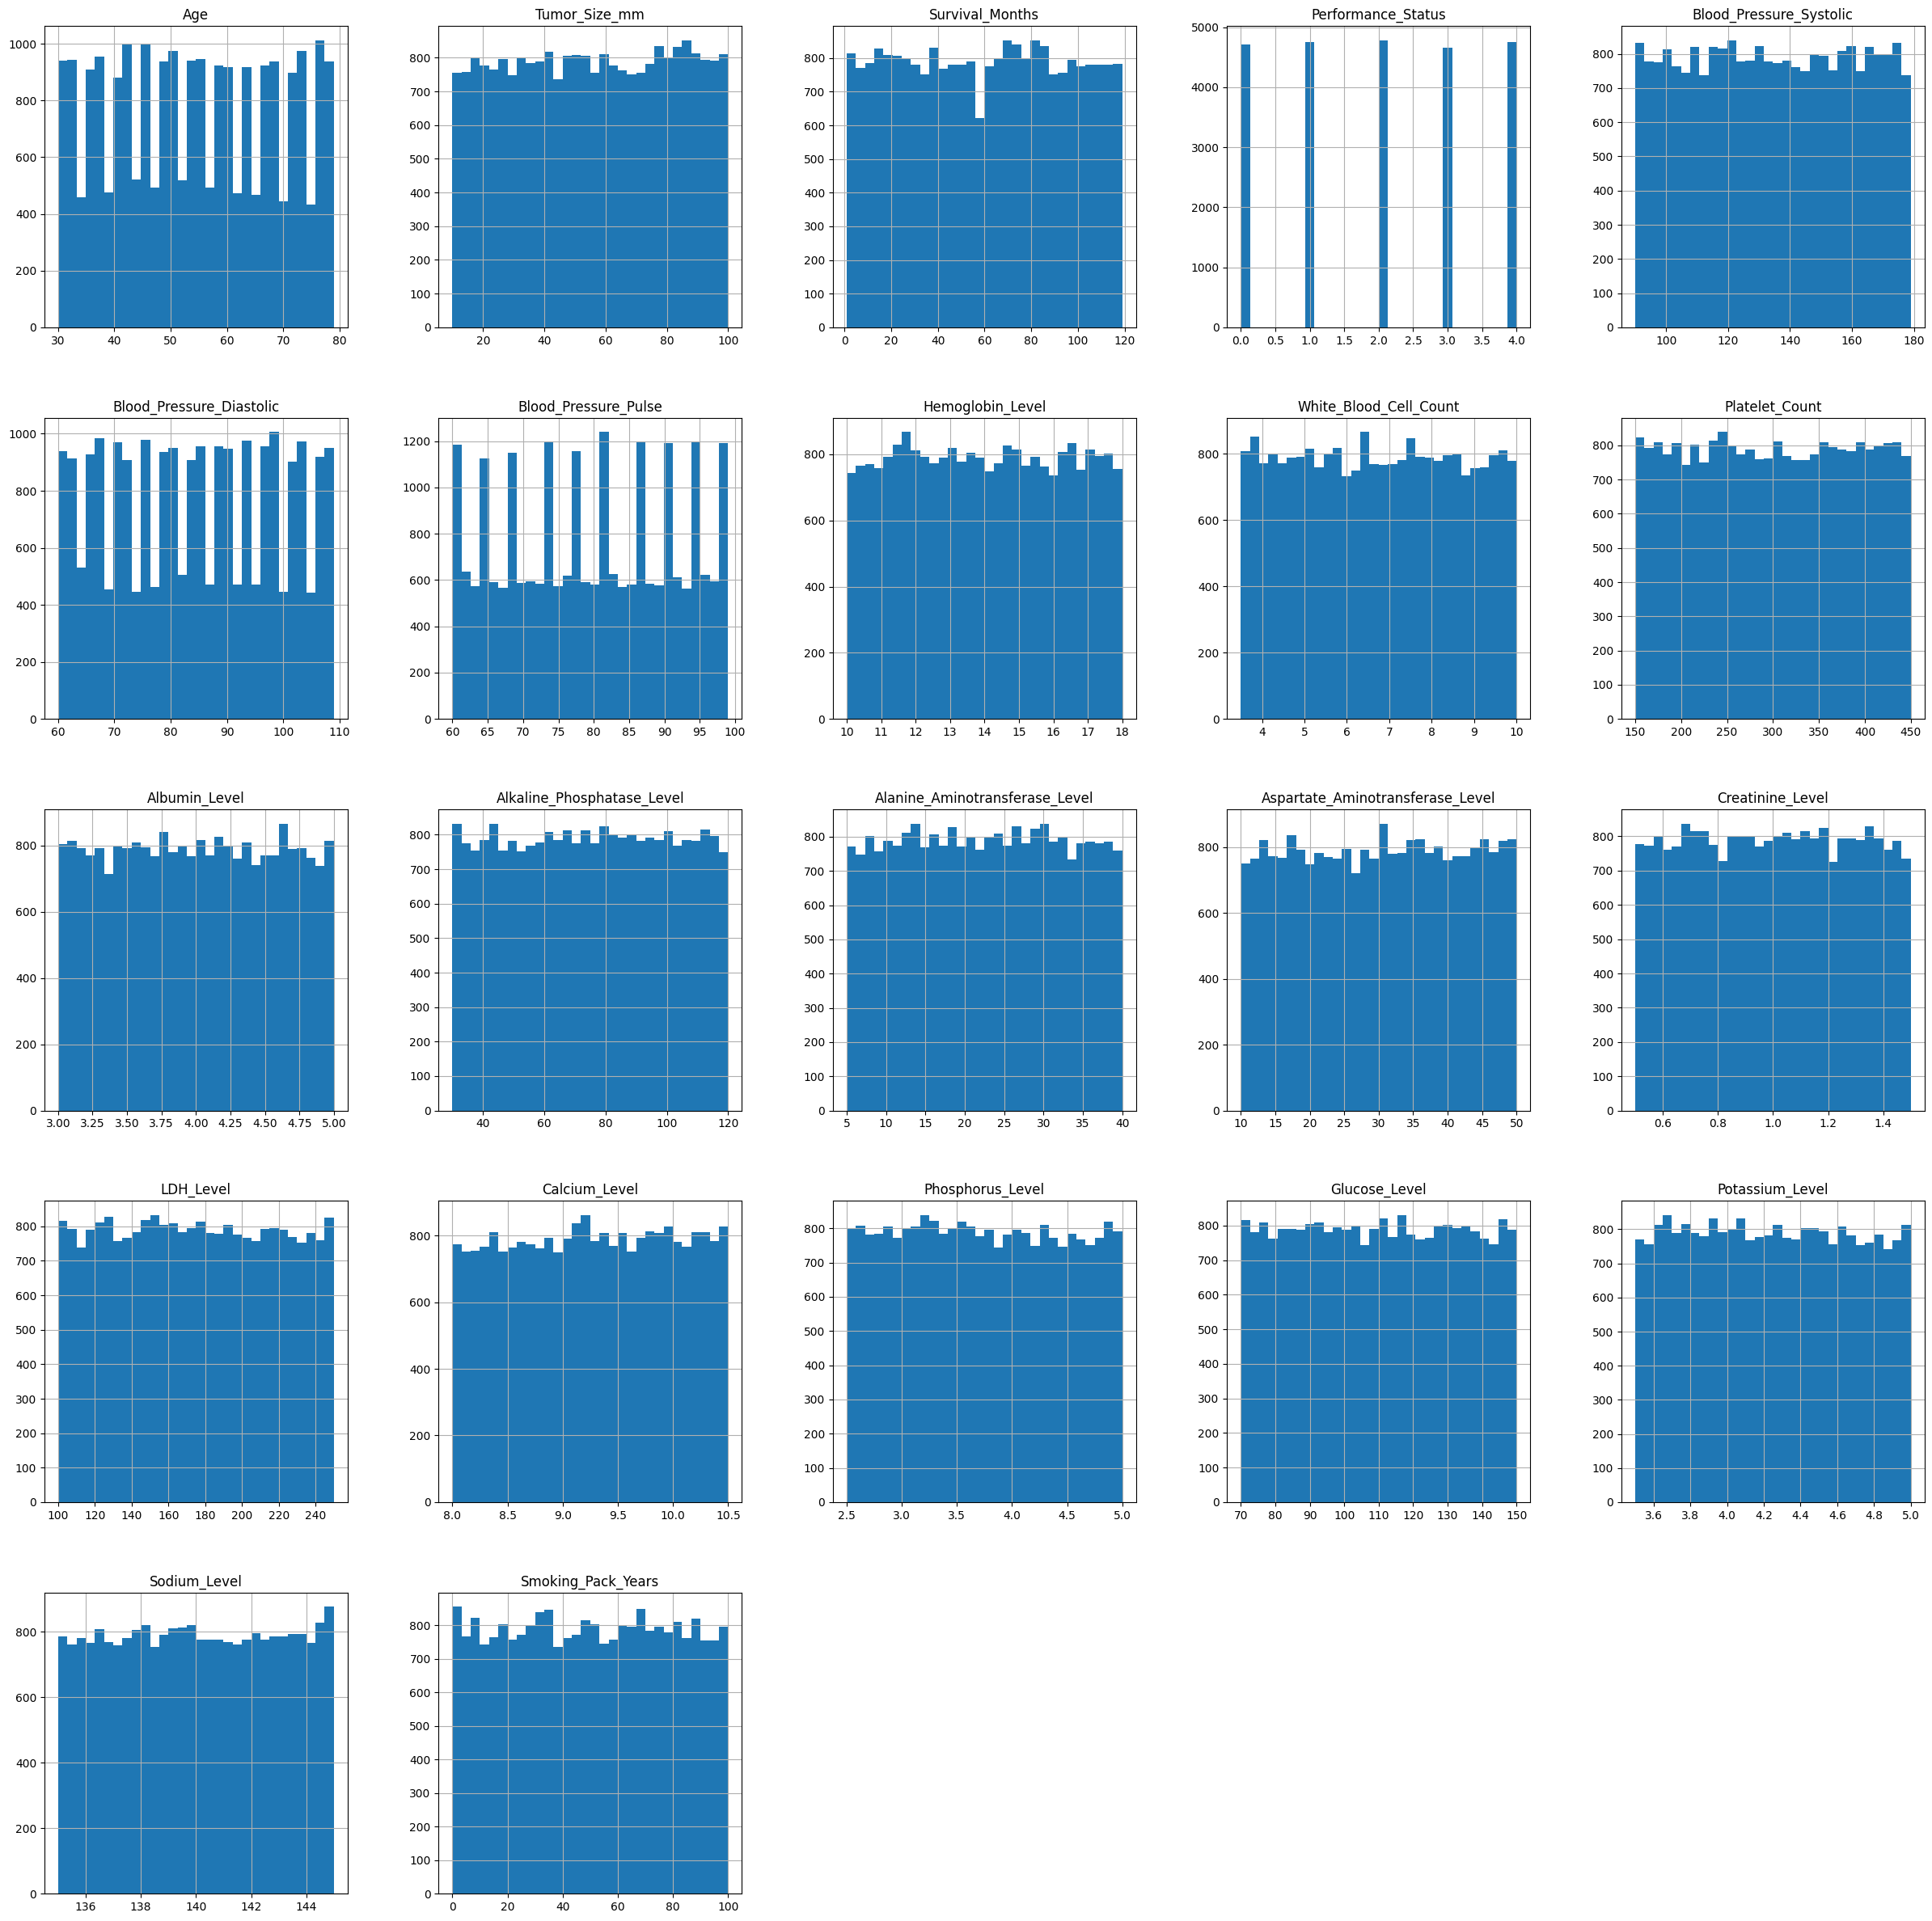

In [79]:
df.hist(bins=30, figsize=(30, 30));

In [80]:
df.isnull().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [81]:
df = df.drop("Patient_ID", axis=1)

In [82]:
df.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,Family_History,Comorbidity_Diabetes,Comorbidity_Hypertension,Comorbidity_Heart_Disease,Comorbidity_Chronic_Lung_Disease,Comorbidity_Kidney_Disease,Comorbidity_Autoimmune_Disease,Comorbidity_Other,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,Alkaline_Phosphatase_Level,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,No,Yes,Yes,Yes,No,Yes,Yes,Yes,3,161,99,92,13.538000,9.800707,321.735266,3.568383,49.310048,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,Yes,Yes,Yes,No,No,Yes,Yes,No,4,101,91,93,16.800312,4.378428,251.581538,3.699357,111.421632,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,Yes,No,No,No,Yes,Yes,No,No,0,109,74,81,14.473493,6.157792,393.456532,4.708385,76.648006,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,Yes,Yes,No,Yes,No,Yes,Yes,No,1,103,85,68,17.442063,6.259383,275.177898,4.727672,81.952486,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,No,Yes,Yes,Yes,No,Yes,No,No,0,165,69,99,13.545171,5.203516,381.705572,4.605604,107.513423,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


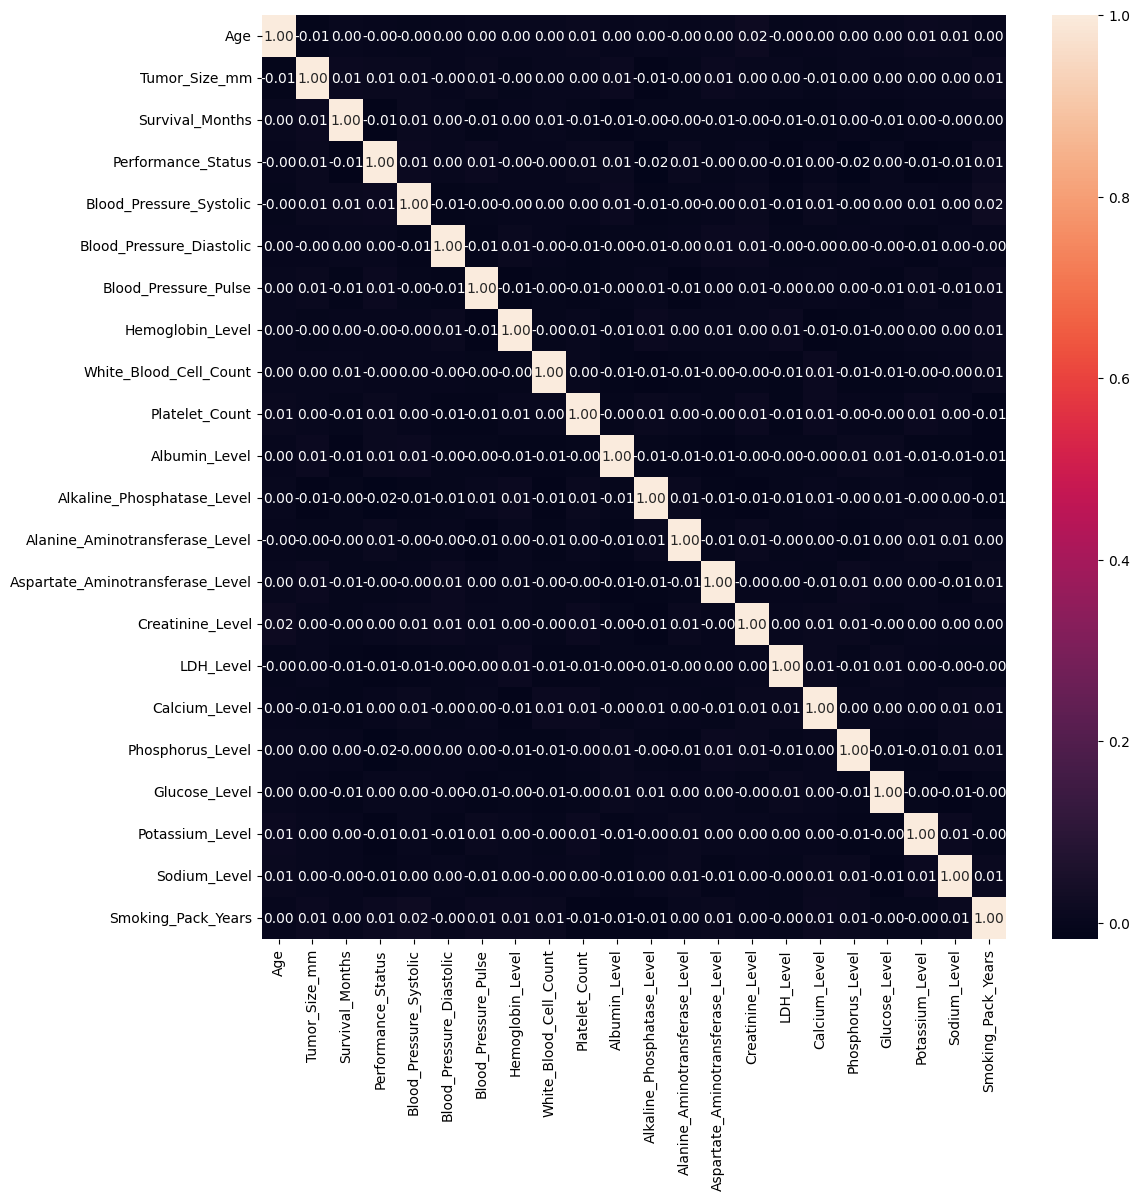

In [83]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f");

In [84]:
categorical = []

for feature in df.columns:
  if df[feature].nunique() < 30:
    categorical.append(feature)
categorical.remove("Stage")

In [85]:
df_new = pd.get_dummies(df[categorical], dtype=int)

In [86]:
df_new.head()

,Performance_Status,Gender_Female,Gender_Male,Smoking_History_Current Smoker,Smoking_History_Former Smoker,Smoking_History_Never Smoked,Tumor_Location_Lower Lobe,Tumor_Location_Middle Lobe,Tumor_Location_Upper Lobe,Treatment_Chemotherapy,Treatment_Radiation Therapy,Treatment_Surgery,Treatment_Targeted Therapy,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Other,Insurance_Type_Medicaid,Insurance_Type_Medicare,Insurance_Type_Other,Insurance_Type_Private,Family_History_No,Family_History_Yes,Comorbidity_Diabetes_No,Comorbidity_Diabetes_Yes,Comorbidity_Hypertension_No,Comorbidity_Hypertension_Yes,Comorbidity_Heart_Disease_No,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_No,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_No,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_No,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_No,Comorbidity_Other_Yes
0,3,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
1,4,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0
2,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0
4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0


In [87]:
df = df.drop(categorical, axis=1)
df = pd.merge(df, df_new, left_index=True, right_index=True)

In [88]:
df.head()

,Age,Tumor_Size_mm,Stage,Survival_Months,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,Alkaline_Phosphatase_Level,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years,Performance_Status,Gender_Female,Gender_Male,Smoking_History_Current Smoker,Smoking_History_Former Smoker,Smoking_History_Never Smoked,Tumor_Location_Lower Lobe,Tumor_Location_Middle Lobe,Tumor_Location_Upper Lobe,Treatment_Chemotherapy,Treatment_Radiation Therapy,Treatment_Surgery,Treatment_Targeted Therapy,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Other,Insurance_Type_Medicaid,Insurance_Type_Medicare,Insurance_Type_Other,Insurance_Type_Private,Family_History_No,Family_History_Yes,Comorbidity_Diabetes_No,Comorbidity_Diabetes_Yes,Comorbidity_Hypertension_No,Comorbidity_Hypertension_Yes,Comorbidity_Heart_Disease_No,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_No,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_No,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_No,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_No,Comorbidity_Other_Yes
0,68,81.678677,Stage III,44,161,99,92,13.538000,9.800707,321.735266,3.568383,49.310048,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956,3,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
1,58,78.448272,Stage I,101,101,91,93,16.800312,4.378428,251.581538,3.699357,111.421632,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893,4,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0
2,44,67.714305,Stage I,69,109,74,81,14.473493,6.157792,393.456532,4.708385,76.648006,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,72,70.806008,Stage III,95,103,85,68,17.442063,6.259383,275.177898,4.727672,81.952486,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0
4,37,87.272433,Stage IV,105,165,69,99,13.545171,5.203516,381.705572,4.605604,107.513423,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0


In [89]:
stage_encoding = {}
j = 0
for i in df["Stage"].unique():
  stage_encoding[i] = j
  j += 1

In [90]:
stage_encoding

{'Stage III': 0, 'Stage I': 1, 'Stage IV': 2, 'Stage II': 3}

In [91]:
df["Stage"] = df["Stage"].map(stage_encoding)

In [92]:
df.head()

,Age,Tumor_Size_mm,Stage,Survival_Months,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,Albumin_Level,Alkaline_Phosphatase_Level,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years,Performance_Status,Gender_Female,Gender_Male,Smoking_History_Current Smoker,Smoking_History_Former Smoker,Smoking_History_Never Smoked,Tumor_Location_Lower Lobe,Tumor_Location_Middle Lobe,Tumor_Location_Upper Lobe,Treatment_Chemotherapy,Treatment_Radiation Therapy,Treatment_Surgery,Treatment_Targeted Therapy,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Other,Insurance_Type_Medicaid,Insurance_Type_Medicare,Insurance_Type_Other,Insurance_Type_Private,Family_History_No,Family_History_Yes,Comorbidity_Diabetes_No,Comorbidity_Diabetes_Yes,Comorbidity_Hypertension_No,Comorbidity_Hypertension_Yes,Comorbidity_Heart_Disease_No,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_No,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_No,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_No,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_No,Comorbidity_Other_Yes
0,68,81.678677,0,44,161,99,92,13.538000,9.800707,321.735266,3.568383,49.310048,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956,3,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1
1,58,78.448272,1,101,101,91,93,16.800312,4.378428,251.581538,3.699357,111.421632,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893,4,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0
2,44,67.714305,1,69,109,74,81,14.473493,6.157792,393.456532,4.708385,76.648006,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,72,70.806008,0,95,103,85,68,17.442063,6.259383,275.177898,4.727672,81.952486,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,1,1,0
4,37,87.272433,2,105,165,69,99,13.545171,5.203516,381.705572,4.605604,107.513423,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0
